# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from IPython.display import display

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [107]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)
#print(list(zip(lats, lngs)))


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
#print("list of city : ",cities)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [108]:

#url =f"https://api.openweathermap.org/data/2.5/weather?"
url ="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key
#print(url)
response=requests.get(url)
print(response)

#initialize 
recordNum=1
setNum =1
numCityNotFound =0

# Create a dictionary for weather check dataframe (based on the dataframe given in started code)
weatherCheck_dict = {"city":cities,
                     "lon": "",
                     "lat": "",
                     "Max Temp": "",
                     "Humidity": "",
                     "Cloudiness": "",
                     "Wind Speed": "",
                     "Country": "",
                     "Date": "" }

weatherCheck_data = pd.DataFrame(weatherCheck_dict)

print('''Beginning Data Retrieval
-----------------------------''')
#Loop through list of cities and perform a request for data on each of them

for city in cities:
    
    query_url =f"{url}&q={city}"
    #print(query_url)
    response =requests.get(query_url).json()
    #print(response)
    #Try except block to catch the missing city and skipping that one
    try:
        #print log
        print("Processing Record",recordNum,"of Set",setNum,"|",city)
        #Insert data into dataframe
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'lon'] = response['coord']['lon']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'lat'] = response['coord']['lat']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Max Temp'] = response['main']['temp_max']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Humidity'] = response['main']['humidity']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Cloudiness'] = response['clouds']['all']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Wind Speed'] = response['wind']['speed']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Country'] = response['sys']['country']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Date'] = response['dt']
    except :
        print("City not found. Skipping...")
        numCityNotFound+=1
        
    #increment the record num count
    recordNum+=1
    #Condition to print sets by breakig the records into 50 each
    if recordNum == 51:
        setNum+=1
        recordNum =1
        #time.sleep(60)
      
print('''   
-----------------------------
Data Retrieval Complete      
-----------------------------''')

print("**Number of Cities Not found: ",numCityNotFound)

<Response [400]>
Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | sao joao da barra
Processing Record 2 of Set 1 | canton
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | cherskiy
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | husavik
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | urdzhar
City not found. Skipping...
Processing Record 11 of Set 1 | kavaratti
Processing Record 12 of Set 1 | salisbury
Processing Record 13 of Set 1 | pevek
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | ostersund
Processing Record 16 of Set 1 | nisia floresta
Processing Record 17 of Set 1 | bonavista
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | ban nahin
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of S

Processing Record 38 of Set 4 | charters towers
Processing Record 39 of Set 4 | portland
Processing Record 40 of Set 4 | salta
Processing Record 41 of Set 4 | tunduru
City not found. Skipping...
Processing Record 42 of Set 4 | ostrovnoy
Processing Record 43 of Set 4 | longyearbyen
Processing Record 44 of Set 4 | beloha
Processing Record 45 of Set 4 | saint-augustin
Processing Record 46 of Set 4 | tual
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | kathmandu
Processing Record 49 of Set 4 | ciudad bolivar
Processing Record 50 of Set 4 | moville
Processing Record 1 of Set 5 | isabela
Processing Record 2 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 5 | pozo colorado
Processing Record 4 of Set 5 | biltine
Processing Record 5 of Set 5 | bilibino
Processing Record 6 of Set 5 | asyut
Processing Record 7 of Set 5 | carroll
Processing Record 8 of Set 5 | gornyy
Processing Record 9 of Set 5 | yialos
City not found. Skipping...

Processing Record 26 of Set 8 | nakano
Processing Record 27 of Set 8 | shetpe
Processing Record 28 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 29 of Set 8 | karasjok
Processing Record 30 of Set 8 | toliary
City not found. Skipping...
Processing Record 31 of Set 8 | chegem
Processing Record 32 of Set 8 | coquimbo
Processing Record 33 of Set 8 | khani
Processing Record 34 of Set 8 | along
Processing Record 35 of Set 8 | leicester
Processing Record 36 of Set 8 | east london
Processing Record 37 of Set 8 | vanavara
Processing Record 38 of Set 8 | saint-pierre
Processing Record 39 of Set 8 | nantucket
Processing Record 40 of Set 8 | aurangabad
Processing Record 41 of Set 8 | griffith
Processing Record 42 of Set 8 | oum hadjer
Processing Record 43 of Set 8 | port macquarie
Processing Record 44 of Set 8 | georgetown
Processing Record 45 of Set 8 | alice springs
Processing Record 46 of Set 8 | murray bridge
Processing Record 47 of Set 8 | samusu
City not found. Sk

Processing Record 11 of Set 12 | rajula
Processing Record 12 of Set 12 | moron
Processing Record 13 of Set 12 | imeni poliny osipenko
Processing Record 14 of Set 12 | sistranda
Processing Record 15 of Set 12 | malwan
City not found. Skipping...
Processing Record 16 of Set 12 | tura
Processing Record 17 of Set 12 | uige
Processing Record 18 of Set 12 | kendari
Processing Record 19 of Set 12 | sorland
Processing Record 20 of Set 12 | indramayu
Processing Record 21 of Set 12 | lemesos
City not found. Skipping...
Processing Record 22 of Set 12 | berdigestyakh
Processing Record 23 of Set 12 | najran
Processing Record 24 of Set 12 | arrifes
Processing Record 25 of Set 12 | sibolga
Processing Record 26 of Set 12 | rio grande city
Processing Record 27 of Set 12 | kurumkan
Processing Record 28 of Set 12 | dagda
Processing Record 29 of Set 12 | miraflores
Processing Record 30 of Set 12 | mahibadhoo
Processing Record 31 of Set 12 | la ronge
Processing Record 32 of Set 12 | khandyga
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [121]:
#export data to csv file
weatherCheck_data.to_csv("OutputFiles/CityData.csv", index=False, header=True)

#display dataframe
display(weatherCheck_data.head(15))

,city,lon,lat,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sao joao da barra,-41.0511,-21.6403,77.09,83.0,0.0,10.80,BR,1.659559e+09
1,canton,113.2500,23.1167,81.88,79.0,100.0,1.23,CN,1.659559e+09
2,rikitea,-134.9692,-23.1203,71.96,68.0,52.0,15.35,PF,1.659559e+09
3,cherskiy,161.3000,68.7500,45.61,85.0,100.0,7.65,RU,1.659559e+09
4,punta arenas,-70.9167,-53.1500,41.11,87.0,75.0,10.36,CL,1.659559e+09
5,souillac,57.5167,-20.5167,70.18,78.0,40.0,9.22,MU,1.659559e+09
6,husavik,-17.3389,66.0449,44.62,96.0,100.0,14.27,IS,1.659559e+09
7,mahebourg,57.7000,-20.4081,70.09,78.0,40.0,9.22,MU,1.659559e+09
8,port alfred,26.8910,-33.5906,61.18,83.0,39.0,1.01,ZA,1.659559e+09
9,urdzhar,NaN,NaN,NaN,NaN,NaN,NaN,,NaN


In [122]:
#In order to get summary of data using DESCRIBE FUNCTION, the values must be in Integer format
print("*****What are the data types ?******")
display(weatherCheck_data.dtypes)

#Convert necessary column to integer
weatherCheck_data[['lon','lat','Max Temp','Humidity','Cloudiness','Wind Speed','Date']]=weatherCheck_data[['lon','lat','Max Temp','Humidity','Cloudiness','Wind Speed','Date']].apply(pd.to_numeric)

    
#Summarize the data
display(weatherCheck_data.describe())


*****What are the data types ?******


city           object
lon           float64
lat           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date          float64
dtype: object

,lon,lat,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,21.623805,20.960910,69.944594,72.007067,56.485866,8.155671,1.659559e+09
std,90.434576,33.643113,13.967412,20.516860,38.510667,5.489514,1.770694e+02
min,-179.166700,-54.800000,35.220000,1.000000,0.000000,0.000000,1.659558e+09
25%,-57.627350,-6.267575,58.985000,63.000000,18.000000,4.297500,1.659559e+09
50%,26.128850,23.605050,71.555000,78.000000,68.000000,7.000000,1.659559e+09
75%,102.444925,50.136700,79.855000,87.000000,97.750000,10.742500,1.659559e+09
max,179.316700,78.218600,105.530000,100.000000,100.000000,33.980000,1.659559e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [124]:
print("After Inspection from the summary stats , humidity has not gone above 100% ")


After Inspection from the summary stats , humidity has not gone above 100% 


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

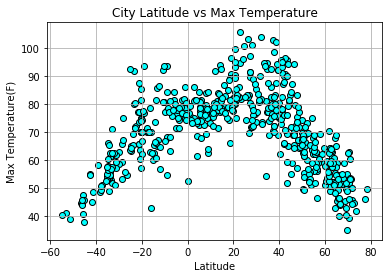

In [137]:
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()

plt.scatter(weatherCheck_data['lat'], weatherCheck_data["Max Temp"],c='cyan', edgecolors="black")
plt.savefig("Images/Latitude_vs_Temperature_Plot.png")
plt.show()

## Latitude vs. Humidity Plot

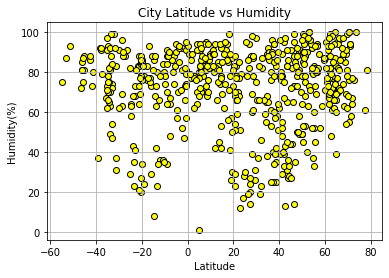

In [138]:
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

plt.scatter(weatherCheck_data['lat'], weatherCheck_data["Humidity"],c='yellow', edgecolors="black")
plt.savefig("Images/Latitude_vs_Humidity_Plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

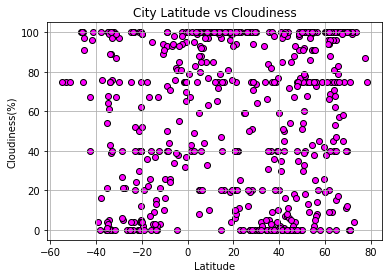

In [139]:
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

plt.scatter(weatherCheck_data['lat'], weatherCheck_data["Cloudiness"],c='magenta', edgecolors="black")
plt.savefig("Images/Latitude_vs_Cloudiness_Plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

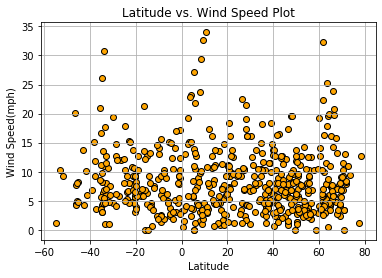

In [140]:
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid()

plt.scatter(weatherCheck_data['lat'], weatherCheck_data["Wind Speed"],c='orange', edgecolors="black")
plt.savefig("Images/Latitude_vs_WindSpeed_Plot.png")
plt.show()

## Linear Regression

In [262]:
#Creating a function so it gets call everytime when it needs the execute same code multiple time

def linearRegression(x,y,xy_1,xy_2):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_equation)
    print(f'The r-square is: {rvalue}')
    
    plt.scatter(x,y,facecolors="violet",edgecolors='red')
    plt.plot(x,regress_values,"r-",color="purple")
    plt.annotate(line_equation,(xy_1,xy_2),fontsize=15,color="purple")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.46x + 89.4
The r-square is: -0.6710811923459913


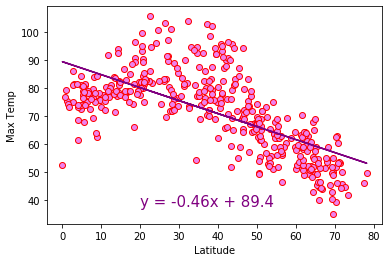

In [263]:
#Data just for northern hemisphere, creating another dataframe
northHemp_data = weatherCheck_data.loc[weatherCheck_data["lat"] > 0]

x = northHemp_data["lat"]
y = northHemp_data["Max Temp"]
xy_1=20
xy_2=38

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Max Temp",fontsize=10)
linearRegression(x,y,xy_1,xy_2)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.73x + 82.5
The r-square is: 0.7673513112012962


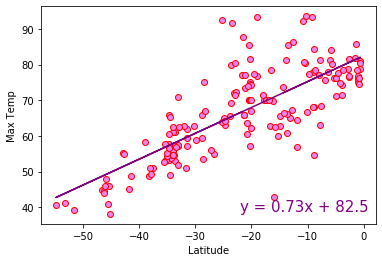

In [264]:
#Data just for sourthern hemisphere, creating another dataframe
southHemp_data = weatherCheck_data.loc[weatherCheck_data["lat"] < 0]

x = southHemp_data["lat"]
y = southHemp_data["Max Temp"]
xy_1=-22
xy_2=39

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Max Temp",fontsize=10)
linearRegression(x,y,xy_1,xy_2)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.06x + 69.52
The r-square is: 0.062619520527292


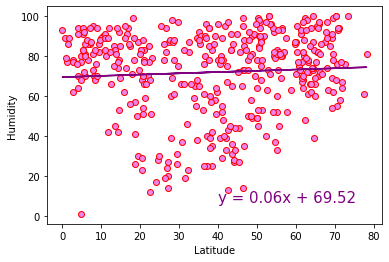

In [265]:
#Data just for northern hemisphere, creating another dataframe
northHemp_data = weatherCheck_data.loc[weatherCheck_data["lat"] > 0]

x = northHemp_data["lat"]
y = northHemp_data["Humidity"]
xy_1=40
xy_2=7

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Humidity",fontsize=10)
linearRegression(x,y,xy_1,xy_2)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.16x + 68.43
The r-square is: -0.11332252299221333


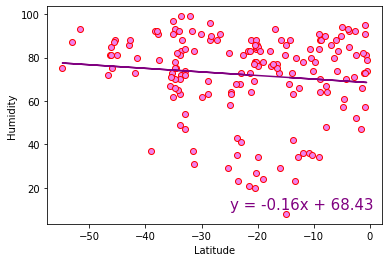

In [266]:
#Data just for southern hemisphere, creating another dataframe
southHemp_data = weatherCheck_data.loc[weatherCheck_data["lat"] < 0]

x = southHemp_data["lat"]
y = southHemp_data["Humidity"]
xy_1=-25
xy_2=10

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Humidity",fontsize=10)
linearRegression(x,y,xy_1,xy_2)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.07x + 61.42
The r-square is: -0.037558620229462415


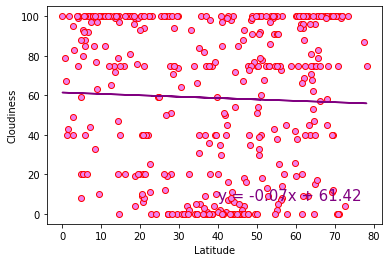

In [267]:
#Data just for northern hemisphere, creating another dataframe
northHemp_data = weatherCheck_data.loc[weatherCheck_data["lat"] > 0]

x = northHemp_data["lat"]
y = northHemp_data["Cloudiness"]
xy_1=40
xy_2=7

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Cloudiness",fontsize=10)
linearRegression(x,y,xy_1,xy_2)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.13x + 48.38
The r-square is: -0.047562927826590225


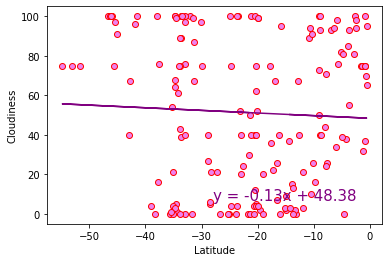

In [268]:
#Data just for southern hemisphere, creating another dataframe
southHemp_data = weatherCheck_data.loc[weatherCheck_data["lat"] < 0]

x = southHemp_data["lat"]
y = southHemp_data["Cloudiness"]
xy_1=-28
xy_2=7

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Cloudiness",fontsize=10)
linearRegression(x,y,xy_1,xy_2)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.02x + 8.79
The r-square is: -0.0630500716823538


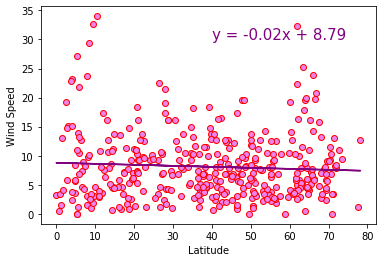

In [269]:
#Data just for northern hemisphere, creating another dataframe
northHemp_data = weatherCheck_data.loc[weatherCheck_data["lat"] > 0]

x = northHemp_data["lat"]
y = northHemp_data["Wind Speed"]
xy_1=40
xy_2=30

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Wind Speed",fontsize=10)
linearRegression(x,y,xy_1,xy_2)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.03x + 7.59
The r-square is: -0.08259056893226625


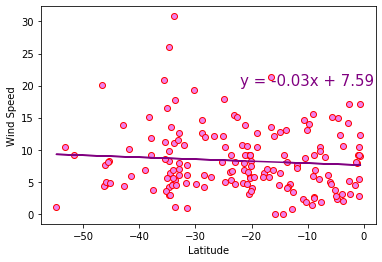

In [270]:
#Data just for northern hemisphere, creating another dataframe
southHemp_data = weatherCheck_data.loc[weatherCheck_data["lat"] < 0]

x = southHemp_data["lat"]
y = southHemp_data["Wind Speed"]
xy_1=-22
xy_2=20

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Wind Speed",fontsize=10)
linearRegression(x,y,xy_1,xy_2)